<a href="https://colab.research.google.com/github/stogaja/clinical-trials/blob/main/clinical_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLINICAL TRIALS**

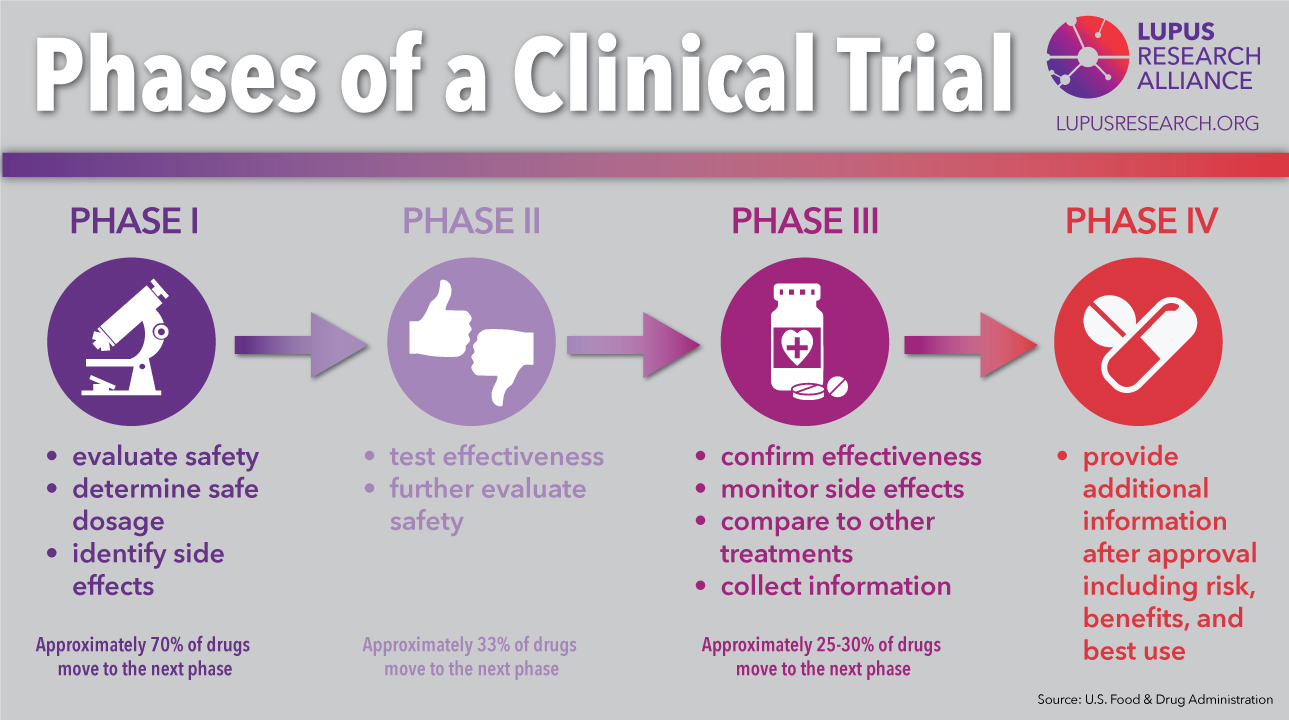

### 1. a)Defining the Question

> What are the key trends and patterns observed in clinical studies related to Cancer, malaria, Covid-19, HIV, Heart Conditions, and pneumonia with a specific focus on studies conducted in Kenya?"

### b) Defining the metric of success

1. **Data Completeness:** Ensure that the datasets for clinical studies related to Cancer, malaria, Covid-19, HIV, Heart Conditions, and pneumonia are comprehensive and contain a substantial amount of relevant information.

2. **Trend Identification:** Successfully identify and analyze trends within the clinical studies, such as the frequency of studies, common study locations, prevalent health conditions, and emerging areas of research.

3. **Geographical Coverage:** Assess the extent of geographical coverage in the clinical studies, evaluating how many different states and countries are involved. This metric's success would be determined by a wide and diverse coverage.

4. **Conclusions and Recommendations:** Produce meaningful and actionable conclusions and recommendations derived from the analysis, providing valuable insights for stakeholders and researchers.

5. **Relevance to Leading Causes of Death:** Ensure that the selected clinical studies are highly relevant to addressing the leading causes of death in Kenya, which include Cancer, malaria, Covid-19, HIV, Heart Conditions, and pneumonia.

6. **Use of Appropriate Tools and Software:** Utilize suitable software or tools proficiently for data analysis. Success in this metric would involve employing the chosen resources effectively.

7. **Documentation and References:** Maintain proper documentation of the analysis process, including references to external sources and datasets. This ensures transparency and reproducibility, which are critical indicators of success in data analysis.

### c) Understanding the context

> The context of the study revolves around the clinical trials database, accessible through https://clinicaltrials.gov/. This database encompasses a comprehensive collection of information regarding ongoing, upcoming, and past clinical research studies. These studies span across all 50 states in the United States and extend to over 200 countries globally.

> For this particular study, data has been extracted from clinical trials focusing on major health conditions including Cancer, malaria, Covid-19, HIV, Heart Conditions, and pneumonia. These conditions are significant contributors to mortality rates in Kenya.

> The objective of this study is to conduct a thorough analysis of the clinical study data. This includes investigating trends within the studies, examining geographical coverage, and ensuring data completeness. Additionally, the study aims to draw meaningful conclusions and recommendations from the analysis.

> The success of this study will be measured by the ability to effectively analyze the data, identify trends, and produce valuable insights relevant to the leading causes of death in Kenya. Additionally, the study's documentation and transparency in the analytical process will be crucial indicators of its success.

> The data should have variables that adequately contribute to effective analysis of clinical trials.

> The dataset should lead to a high model fit (high accuracy, after all possible model optimization procedures have been applied.


### d) Recording the experimental design

1. Data sourcing/loading
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preparation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Conclusion
12. Follow up questions

### e) Data relevance

# 2. Data Understanding

In [1]:
# lets import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from six import StringIO
from IPython.display import Image
import pydotplus
import os

# filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')


### a) reading the data

In [2]:
# lets mount our google drive folder
from google.colab import drive

# lets mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# lets create a function to read the data
def read_data(data):
   df = pd.read_csv(data)
   return df

In [4]:
# lets define the directory path containing your CSV files
directory_path = '/content/drive/MyDrive/DTE/'

# lets get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# lets initialize an empty dictionary to store DataFrames
data_frames = {}

# lets iterate through the CSV files and read them into DataFrames
for file_name in csv_files:
    # here we generate a key for the DataFrame using the file name (excluding extension)
    key = os.path.splitext(file_name)[0]

    # finally read the CSV file into a DataFrame
    file_path = os.path.join(directory_path, file_name)
    data_frames[key] = pd.read_csv(file_path)

### b) Checking the data

Number of records in the datasets

In [5]:
# lets see the number of rows and columns in the datasets using a for loop
for name, df in data_frames.items():
    print(f'{name}: rows = {df.shape[0]} and columns = {df.shape[1]}')


Copy of Cancer-studies: rows = 100262 and columns = 30
Copy of Covid 19-studies: rows = 9342 and columns = 30
Copy of Heart: rows = 32176 and columns = 30
Copy of HIV-studies: rows = 9113 and columns = 30
Copy of Malaria-studies: rows = 1330 and columns = 30
Copy of Pneumonia-studies: rows = 9640 and columns = 30
clinicaltrials: rows = 152158 and columns = 25


> The datasets are big in terms of size which makes analysis and drawing insights from them accurate

Top view of datasets

In [6]:
# getting individual csv files from drive and printing the top view of the datasets
# for cancer dataset
cancer = data_frames['Copy of Cancer-studies']
cancer.head(3)

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT02426125,A Study of Ramucirumab (LY3009806) Plus Doceta...,https://clinicaltrials.gov/study/NCT02426125,RANGE,COMPLETED,The main purpose of this study is to evaluate ...,YES,Urothelial Carcinoma,DRUG: Ramucirumab|DRUG: Docetaxel|DRUG: Placebo,"Progression Free Survival (PFS), PFS defined a...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,15679|I4T-MC-JVDC|2014-003655-66,2015-07-13,2017-04-21,2022-07-26,2015-04-24,2019-01-25,2023-08-21,"Highlands Oncology Group, Fayetteville, Arkans...",Study Protocol|Statistical Analysis Plan
1,NCT04910425,PSMA-Targeted 18F-DCFPyL PET/MRI for the Detec...,https://clinicaltrials.gov/study/NCT04910425,NaN,NOT_YET_RECRUITING,This phase II trial studies how well 18F-DCFPy...,NO,Prostate Carcinoma,DRUG: Fluorine F 18 DCFPyL|DRUG: Gadobenate Di...,18-F-DCFPyL positron emission tomography (PET)...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,NU 19U05|NCI-2021-05593|STU00212326|NU 19U05|P...,2023-06-17,2026-06-17,2028-07,2021-06-02,NaN,2022-08-03,"Northwestern University, Chicago, Illinois, 60...",NaN
2,NCT04116125,Omitting Biopsy of SEntinel Lymph Node With Ra...,https://clinicaltrials.gov/study/NCT04116125,OBSERB,NOT_YET_RECRUITING,"The OBSERB study is a multi-center, non-blinde...",NO,Breast Neoplasm Female|Lymphatic Metastasis,PROCEDURE: Radiotherapy,"Disease-free survival, Disease free survival i...",...,Allocation: RANDOMIZED|Intervention Model: SIN...,2019-09-023,2020-07-01,2023-06-30,2025-06-30,2019-10-04,NaN,2019-10-04,NaN,NaN


In [7]:
# for covid dataset
covid = data_frames['Copy of Covid 19-studies']
covid.head(3)

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT04614025,Open-label Multicenter Study to Evaluate the E...,https://clinicaltrials.gov/study/NCT04614025,NaN,ACTIVE_NOT_RECRUITING,This clinical trial will examine if a new trea...,NO,COVID|ARDS,BIOLOGICAL: PLX-PAD,"Number of ventilator-free days, 28 days",...,Allocation: RANDOMIZED|Intervention Model: PAR...,PLX-COV-03,2020-10-19,2021-08-04,2023-01,2020-11-03,NaN,2022-12-21,"Charite Campus Virchow, Berlin, 10117, Germany...",NaN
1,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
2,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan


In [8]:
# for heart dataset
heart = data_frames['Copy of Heart']
heart.head(3)

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,PROACT,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,2005-01|G050208,2006-06-06,2022-12-31,2022-12-31,2006-02-14,NaN,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",NaN
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,NaN,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,A4070417|2U54MD007600-31,2020-09-01,2023-04-30,2023-12-30,2018-02-01,NaN,2023-05-30,"University Hospital at Carolina, Carolina, 009...",NaN
2,NCT03176225,Evaluate Safety and Effectiveness of XenoSure ...,https://clinicaltrials.gov/study/NCT03176225,NaN,RECRUITING,The purpose of this clinical trial is to colle...,NO,Heart Diseases,PROCEDURE: Open heart surgery to address the h...,Leakage rate at 6 month post-procedure measure...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,P15077-1,2017-08-15,2025-11-15,2026-02-15,2017-06-05,NaN,2023-03-10,"Chinese PLA General Hospital, Beijing, Beijing...",NaN


In [9]:
# for HIV dataset
hiv = data_frames['Copy of HIV-studies']
hiv.head(3)

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT00914225,Effect of Bednets and a Water Purification Dev...,https://clinicaltrials.gov/study/NCT00914225,ITN,COMPLETED,In many areas of the world most severely affec...,NO,HIV Infections|Human Immunodeficiency Virus|Ma...,OTHER: Bednets and Water Purification,To determine the effect of LLIN and a simple m...,...,Observational Model: |Time Perspective: p,35464-B|SSC#1554,2009-09,2011-12,2011-12,2009-06-04,NaN,2015-05-29,"Kisii Provincial Hospital, Kisii, Kenya|Kisumu...",NaN
1,NCT02167425,Study of Integrating Antiretroviral Therapy Wi...,https://clinicaltrials.gov/study/NCT02167425,IMAT,UNKNOWN,To improve ART initiation among people who inj...,NO,HIV|Opioid Dependence,OTHER: IMAT,"Time to CD4 Screening, Number of days between ...",...,Observational Model: |Time Perspective: p,IMAT-01|R34DA037787,2015-02,2017-03,2017-03,2014-06-19,NaN,2015-11-23,NaN,NaN
2,NCT01423825,Evaluating the Safety and Immune Response to a...,https://clinicaltrials.gov/study/NCT01423825,NaN,COMPLETED,This is an extension of the HVTN 073/SAAVI 102...,NO,HIV Infections,BIOLOGICAL: Sub C gp140 Vaccine|BIOLOGICAL: MF...,"Safety data, including signs and symptoms of l...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,HVTN 073E/SAAVI 102|11824,2011-08,2013-07,2013-07,2011-08-26,NaN,2021-10-14,Brigham and Women's Hospital Vaccine CRS (BWH ...,NaN


In [10]:
# for malaria dataset
malaria = data_frames['Copy of Malaria-studies']
malaria.head(3)

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT01976325,Evaluating the Ottawa Malaria Decision Aid,https://clinicaltrials.gov/study/NCT01976325,OMDA,UNKNOWN,BRIEF SUMMARY\n\nCanadians often visit areas w...,NO,Malaria,OTHER: Ottawa Malaria Decision Aid,"Travellers' Knowledge Score, The traveller's k...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,2010462-01H,2014-01,2015-11,2015-11,2013-11-05,NaN,2015-04-16,National Capital Region Occupational Health Cl...,NaN
1,NCT00914225,Effect of Bednets and a Water Purification Dev...,https://clinicaltrials.gov/study/NCT00914225,ITN,COMPLETED,In many areas of the world most severely affec...,NO,HIV Infections|Human Immunodeficiency Virus|Ma...,OTHER: Bednets and Water Purification,To determine the effect of LLIN and a simple m...,...,Observational Model: |Time Perspective: p,35464-B|SSC#1554,2009-09,2011-12,2011-12,2009-06-04,NaN,2015-05-29,"Kisii Provincial Hospital, Kisii, Kenya|Kisumu...",NaN
2,NCT05605925,Ivermectin-artemisinin Combination Therapy for...,https://clinicaltrials.gov/study/NCT05605925,IVIME,RECRUITING,Malaria remains a leading cause of morbidity a...,NO,Malaria,DRUG: Artemether/lumefantrine|DRUG: Ivermectin,"Malaria transmission rates in a household, Mal...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,MAKSHSREC-2021-237,2022-08-04,2022-12-31,2022-12-31,2022-11-04,NaN,2022-11-04,"ST. Paul's Health Center, Kasese, Uganda",NaN


In [11]:
# for pneumonia dataset
pneumonia = data_frames['Copy of Pneumonia-studies']
pneumonia.head(3)

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT02708225,The Influence of Medical Clowns on the Perform...,https://clinicaltrials.gov/study/NCT02708225,clowns,UNKNOWN,Medical clowns are known to assist in relaxing...,NO,Asthma|Pneumonia,BEHAVIORAL: medical clown,"length of experium (seconds), length of experi...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,0026-15,2016-03,2016-10,2017-10,2016-03-15,NaN,2016-03-15,NaN,NaN
1,NCT03962725,Avoiding Neuromuscular Blockers to Reduce Comp...,https://clinicaltrials.gov/study/NCT03962725,NaN,TERMINATED,The goal of this study to evaluate whether eli...,NO,Respiratory Failure|Respiratory Infection|Aspi...,DRUG: Neuromuscular Blocking Agents|DRUG: Anes...,Number of participants who either had postoper...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2019P000260,2019-08-07,2022-12-19,2022-12-19,2019-05-24,NaN,2023-02-02,"Massachusetts General Hospital, Boston, Massac...",NaN
2,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN


The datasets have missing values, the columns need reformarting in terms of the names and the null values need to be handled too, but first we append the datasets seeing that they have **same structure, and we want to combine their rows.**

In [12]:
# lets apppend the datasets to make analysis easy
# Concatenate the DataFrames
main_df = pd.concat([cancer, covid, heart, hiv, malaria, pneumonia], ignore_index=True)

# lets see the top view of main df
main_df.head()


,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT02426125,A Study of Ramucirumab (LY3009806) Plus Doceta...,https://clinicaltrials.gov/study/NCT02426125,RANGE,COMPLETED,The main purpose of this study is to evaluate ...,YES,Urothelial Carcinoma,DRUG: Ramucirumab|DRUG: Docetaxel|DRUG: Placebo,"Progression Free Survival (PFS), PFS defined a...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,15679|I4T-MC-JVDC|2014-003655-66,2015-07-13,2017-04-21,2022-07-26,2015-04-24,2019-01-25,2023-08-21,"Highlands Oncology Group, Fayetteville, Arkans...",Study Protocol|Statistical Analysis Plan
1,NCT04910425,PSMA-Targeted 18F-DCFPyL PET/MRI for the Detec...,https://clinicaltrials.gov/study/NCT04910425,NaN,NOT_YET_RECRUITING,This phase II trial studies how well 18F-DCFPy...,NO,Prostate Carcinoma,DRUG: Fluorine F 18 DCFPyL|DRUG: Gadobenate Di...,18-F-DCFPyL positron emission tomography (PET)...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,NU 19U05|NCI-2021-05593|STU00212326|NU 19U05|P...,2023-06-17,2026-06-17,2028-07,2021-06-02,NaN,2022-08-03,"Northwestern University, Chicago, Illinois, 60...",NaN
2,NCT04116125,Omitting Biopsy of SEntinel Lymph Node With Ra...,https://clinicaltrials.gov/study/NCT04116125,OBSERB,NOT_YET_RECRUITING,"The OBSERB study is a multi-center, non-blinde...",NO,Breast Neoplasm Female|Lymphatic Metastasis,PROCEDURE: Radiotherapy,"Disease-free survival, Disease free survival i...",...,Allocation: RANDOMIZED|Intervention Model: SIN...,2019-09-023,2020-07-01,2023-06-30,2025-06-30,2019-10-04,NaN,2019-10-04,NaN,NaN
3,NCT03566225,Pioglitazone Versus Metformin as First Treatme...,https://clinicaltrials.gov/study/NCT03566225,NaN,COMPLETED,Participants with PCOS will be divided into tw...,NO,Pioglitazone,DRUG: Pioglitazone|DRUG: Metformin|DRUG: Clomi...,"Clinical pregnancy rate, Pregnancy rate diagno...",...,Allocation: RANDOMIZED|Intervention Model: SIN...,AinShamaU,2018-01-30,2021-02-28,2021-03-30,2018-06-25,NaN,2021-06-02,"Ain Shams Univerisity, Cairo, Egypt",NaN
4,NCT01756625,"PREMIUM, Observational Study",https://clinicaltrials.gov/study/NCT01756625,NaN,UNKNOWN,PREMIUM is an observational pharmaco-epidemiol...,NO,First Line WT KRAS mCRC,NaN,To compare PFS rate at 1 year with PFS in clin...,...,Observational Model: |Time Perspective: p,PREMIUM,2010-01,2012-03,2013-06,2012-12-27,NaN,2012-12-27,"Institut Sainte-Catherine, Avignon, Vaucluse, ...",NaN


> The appended dataset makes refferencing, cleaning and analysis easy.

### c) Checking the Datatypes

In [13]:
# lets see the data types of main_df
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161863 entries, 0 to 161862
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   NCT Number                  161863 non-null  object 
 1   Study Title                 161863 non-null  object 
 2   Study URL                   161863 non-null  object 
 3   Acronym                     48532 non-null   object 
 4   Study Status                161863 non-null  object 
 5   Brief Summary               161863 non-null  object 
 6   Study Results               161863 non-null  object 
 7   Conditions                  161857 non-null  object 
 8   Interventions               144610 non-null  object 
 9   Primary Outcome Measures    153676 non-null  object 
 10  Secondary Outcome Measures  119675 non-null  object 
 11  Other Outcome Measures      13107 non-null   object 
 12  Sponsor                     161863 non-null  object 
 13  Collaborators 

> We have 30 columns in total, with alot of null values, which we will sort after further analysis, the column names will be edited for easy refference and some of the data types need to be corrected.

# 3. External Data Validation

> After cross-referencing the information gathered from clinical trials with authoritative sources such as medical journals and regulatory bodies, we can confirm the validity of the data and identify any discrepancies or errors that that may have occurred during data collection. In so doing we conclude that the dataset has high credibility and can be used for the research question as it falls within its scope.

# 4. Data Preparation

### a) Consistency

Here we check for duplicates in our datasets before dropping any column

In [14]:
# Checking for duplicates
main_df.duplicated().any().any()

True

> The data has some duplicate values.

In [15]:
# dropping duplicates
main_df.drop_duplicates(inplace = True)

In [16]:
# Checking changes
main_df.duplicated().any().any()


False

> The duplicates have been removed.

### b) Validation

In [17]:
# lets sort the column names
main_df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

> We want to remove all the white spaces and change the names to lowercase for easy accesibility.

In [18]:
# removing the white spaces and converting the column names to lowercase
main_df.columns = main_df.columns.str.replace(' ', '_').str.lower()
main_df.columns

Index(['nct_number', 'study_title', 'study_url', 'acronym', 'study_status',
       'brief_summary', 'study_results', 'conditions', 'interventions',
       'primary_outcome_measures', 'secondary_outcome_measures',
       'other_outcome_measures', 'sponsor', 'collaborators', 'sex', 'age',
       'phases', 'enrollment', 'funder_type', 'study_type', 'study_design',
       'other_ids', 'start_date', 'primary_completion_date', 'completion_date',
       'first_posted', 'results_first_posted', 'last_update_posted',
       'locations', 'study_documents'],
      dtype='object')

> The columns are properly been named

### c) Completeness

Percentage of missing values in the datasets

In [19]:
# Check percentage of missing values for each column
# List of columns with missin values
missing_cols = []
for i, col in enumerate(main_df.columns):
  missing = (main_df[col].isnull().sum()/main_df.shape[0])*100
  if missing > 0:
    missing_cols.append(col)
  print(f'{i+1}. {col} = {(main_df[col].isnull().sum()/main_df.shape[0])*100}%')


1. nct_number = 0.0%
2. study_title = 0.0%
3. study_url = 0.0%
4. acronym = 70.56020715309087%
5. study_status = 0.0%
6. brief_summary = 0.0%
7. study_results = 0.0%
8. conditions = 0.0039432694961816%
9. interventions = 10.349110792728611%
10. primary_outcome_measures = 5.221546024527137%
11. secondary_outcome_measures = 25.928968572142114%
12. other_outcome_measures = 92.01422205864957%
13. sponsor = 0.0%
14. collaborators = 62.41669843189316%
15. sex = 0.09858173740454003%
16. age = 0.0%
17. phases = 48.74012539596998%
18. enrollment = 2.214145822105969%
19. funder_type = 0.0%
20. study_type = 0.0%
21. study_design = 0.30428896278868023%
22. other_ids = 0.01314423165393867%
23. start_date = 1.4432366356024657%
24. primary_completion_date = 5.308297953443131%
25. completion_date = 4.704977720527347%
26. first_posted = 0.0%
27. results_first_posted = 87.36050684157257%
28. last_update_posted = 0.0%
29. locations = 8.894701560220298%
30. study_documents = 93.57707120230286%


> The acronym, other_outcome_measures, study_documents, results_first_posted columns will be dropped as the have more than 70% of the data missing.

> The rest will be imputed.

In [20]:
# columns with missing values
missing_cols

['acronym',
 'conditions',
 'interventions',
 'primary_outcome_measures',
 'secondary_outcome_measures',
 'other_outcome_measures',
 'collaborators',
 'sex',
 'phases',
 'enrollment',
 'study_design',
 'other_ids',
 'start_date',
 'primary_completion_date',
 'completion_date',
 'results_first_posted',
 'locations',
 'study_documents']

In [21]:
# dropping columns
columns_to_drop = ['acronym', 'other_outcome_measures', 'study_documents', 'collaborators', 'results_first_posted']
df = main_df.drop(columns = columns_to_drop)
df.shape

(152158, 25)

In [22]:
# List of columns with missin values to be imputed
missing_cols = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_cols.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')


1. nct_number = 0.0%
2. study_title = 0.0%
3. study_url = 0.0%
4. study_status = 0.0%
5. brief_summary = 0.0%
6. study_results = 0.0%
7. conditions = 0.0039432694961816%
8. interventions = 10.349110792728611%
9. primary_outcome_measures = 5.221546024527137%
10. secondary_outcome_measures = 25.928968572142114%
11. sponsor = 0.0%
12. sex = 0.09858173740454003%
13. age = 0.0%
14. phases = 48.74012539596998%
15. enrollment = 2.214145822105969%
16. funder_type = 0.0%
17. study_type = 0.0%
18. study_design = 0.30428896278868023%
19. other_ids = 0.01314423165393867%
20. start_date = 1.4432366356024657%
21. primary_completion_date = 5.308297953443131%
22. completion_date = 4.704977720527347%
23. first_posted = 0.0%
24. last_update_posted = 0.0%
25. locations = 8.894701560220298%


In [23]:
# function that finds the unique value in a column then imputes the missing data with the mode
def impute_mode(df_impute, column_name):
    unique_values = df_impute[column_name].unique()
    mode = df_impute[column_name].mode()[0]
    df_impute[column_name].fillna(mode, inplace=True)

In [24]:
# imputing the missing values in the other columns
columns_to_impute = [
    'conditions', 'interventions', 'primary_outcome_measures',
    'secondary_outcome_measures', 'sex', 'phases', 'enrollment',
    'study_design', 'start_date', 'primary_completion_date',
    'completion_date', 'locations'
]

for column in columns_to_impute:
    impute_mode(df, column)

In [25]:
# let's check for missing values
df.isnull().sum()

nct_number                     0
study_title                    0
study_url                      0
study_status                   0
brief_summary                  0
study_results                  0
conditions                     0
interventions                  0
primary_outcome_measures       0
secondary_outcome_measures     0
sponsor                        0
sex                            0
age                            0
phases                         0
enrollment                     0
funder_type                    0
study_type                     0
study_design                   0
other_ids                     20
start_date                     0
primary_completion_date        0
completion_date                0
first_posted                   0
last_update_posted             0
locations                      0
dtype: int64

> Other IDs column wont be imputed because ids cant be similar.

In [26]:
# lets check the datatypes of the columns
df.dtypes

nct_number                     object
study_title                    object
study_url                      object
study_status                   object
brief_summary                  object
study_results                  object
conditions                     object
interventions                  object
primary_outcome_measures       object
secondary_outcome_measures     object
sponsor                        object
sex                            object
age                            object
phases                         object
enrollment                    float64
funder_type                    object
study_type                     object
study_design                   object
other_ids                      object
start_date                     object
primary_completion_date        object
completion_date                object
first_posted                   object
last_update_posted             object
locations                      object
dtype: object

> We need to convert enrollment needs to be converted into integer, start_date, primary_completion_date, completion_date, first_posted and last_update_posted need to be converted to datetime.

In [27]:
# converting data types
df['enrollment'] = df['enrollment'].astype(int)
date_columns = ['start_date', 'primary_completion_date', 'completion_date', 'first_posted', 'last_update_posted']

# looping through date columns
for column in date_columns:
  df[column] = pd.to_datetime(df[column], errors = 'coerce')

# lets filter rows with invalid dates
for column in date_columns:
  df = df.dropna(subset=[column])

In [28]:
# confirming datatypes
df.dtypes

nct_number                            object
study_title                           object
study_url                             object
study_status                          object
brief_summary                         object
study_results                         object
conditions                            object
interventions                         object
primary_outcome_measures              object
secondary_outcome_measures            object
sponsor                               object
sex                                   object
age                                   object
phases                                object
enrollment                             int64
funder_type                           object
study_type                            object
study_design                          object
other_ids                             object
start_date                    datetime64[ns]
primary_completion_date       datetime64[ns]
completion_date               datetime64[ns]
first_post

> The columns have the right data types.

### d) Outliers

In [29]:
# function to get outliers using iqr
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [30]:
# lets select the columns with continous variables
continous = list(df.select_dtypes(include = ['int64']))
outliers(df[continous])

Number of outliers = 21301
Percentage = 13.99926392302738%


> The outliers do not form a significant part of the data, however we will perform standardization to normalize the distribution of the data.


In [31]:
# lets save the dataset to csv
#df.to_csv('/content/drive/My Drive/DTE/clinicaltrials.csv', index=False)


# 5. Descriptive Analysis

### a) univariate Analysis

Categorical

In [32]:
# function for categorical plots
def plot_frequency_distribution(x_values, y_values, x_label):
    plt.bar(x_values, y_values, color = 'purple')
    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {x_label}')
    plt.xticks(rotation=90)
    plt.show()

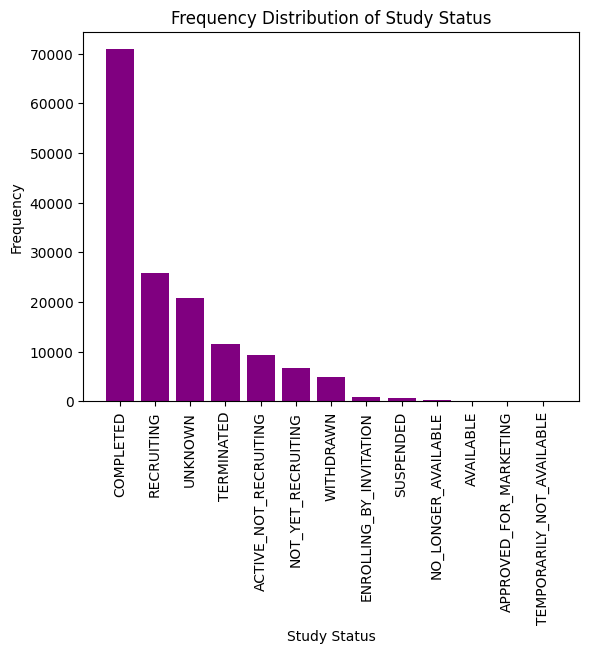

In [33]:
# lets plot for study status
study_status_counts = df['study_status'].value_counts()
plot_frequency_distribution(study_status_counts.index, study_status_counts.values, 'Study Status')

> Most of the studies are completed the clinical trials.

In [34]:
# univariate analysis on interventios
# lets see the unique values for interventions
df['interventions'].unique()

array(['DRUG: Ramucirumab|DRUG: Docetaxel|DRUG: Placebo',
       'DRUG: Fluorine F 18 DCFPyL|DRUG: Gadobenate Dimeglumine|DRUG: Gadobutrol|PROCEDURE: Magnetic Resonance Imaging|PROCEDURE: Multiparametric Magnetic Resonance Imaging|PROCEDURE: Positron Emission Tomography|PROCEDURE: Transrectal Ultrasonography Guided Biopsy',
       'PROCEDURE: Radiotherapy', ...,
       'OTHER: Pathogen resistant phenotype',
       'DRUG: LBH589|DRUG: Methylprednisolone',
       'DIAGNOSTIC_TEST: Point-of-care Test'], dtype=object)

> These are the drugs that were majorly tested during the clinical trials.

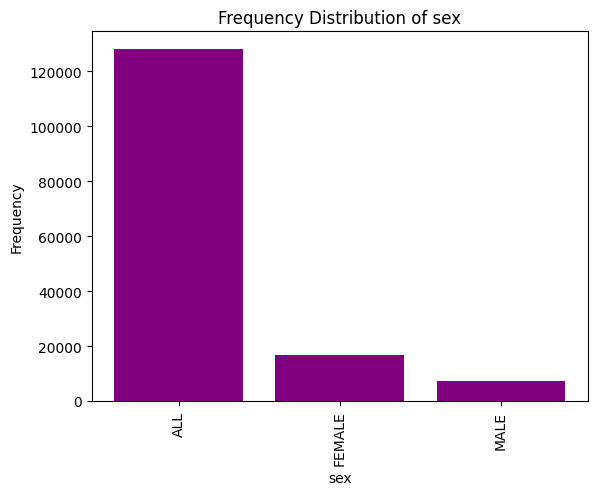

In [35]:
# lets plot for sex
sex_counts = df['sex'].value_counts()
plot_frequency_distribution(sex_counts.index,  sex_counts.values, 'sex')

> Studies focusing on both genders were more than those focusing male and female individually for the clinical trials.

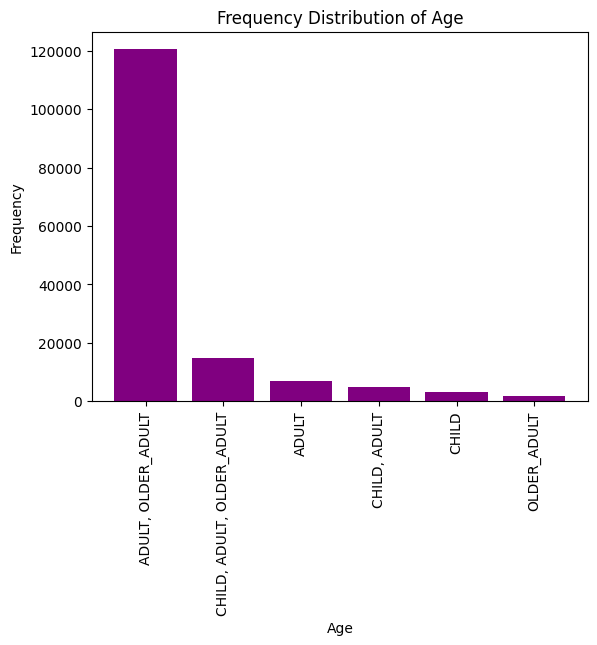

In [36]:
# lets plot for age
age_counts = df['age'].value_counts()
plot_frequency_distribution(age_counts.index, age_counts.values, 'Age')

> The clusters of test subjects that comprised of adults and older adults were the ones that participated in the clinical trials the most, while the cluster that comprised of older adults only had the smallest number of participants.

In [37]:
# lets plot for the study phases
phases_counts = df['phases'].value_counts()

fig = go.Figure(go.Bar(
    x=phases_counts.index,
    y=phases_counts.values,
    text=phases_counts.index,
    textposition='outside',
    marker_color=phases_counts.values
))

fig.update_layout(
    title='Phases Across Studies',
    xaxis_title = 'Phases',
    yaxis_title = 'Count of phases')
fig.show()

[]

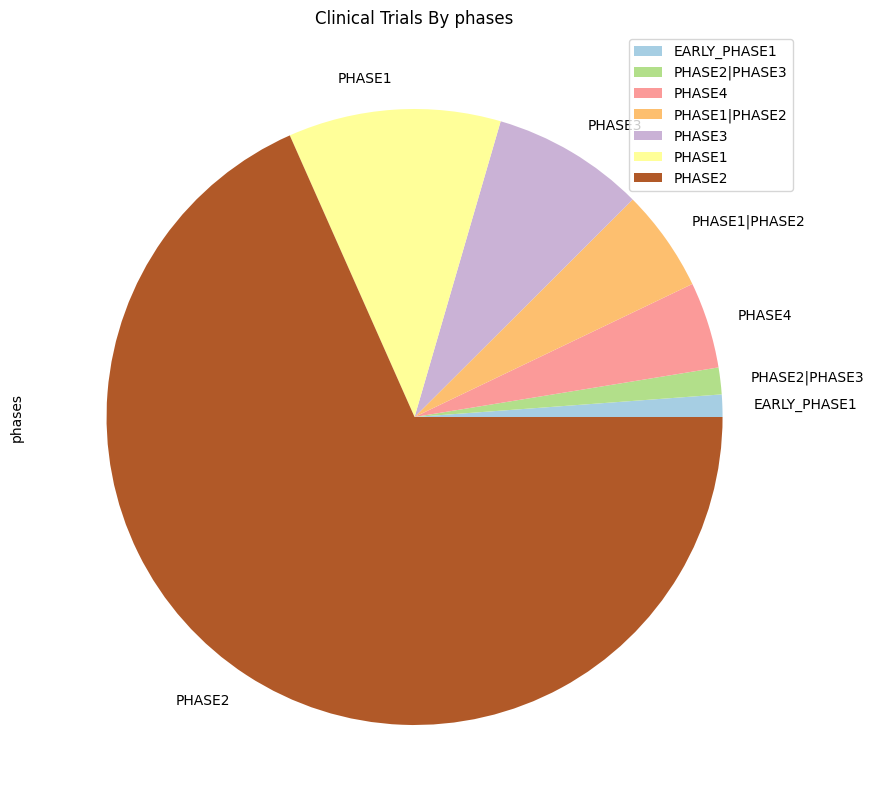

In [38]:
# lets plot a pie chart for phases
ax = df['phases'].value_counts().sort_values().plot(kind='pie', figsize=(20,10), colormap='Paired', title='Clinical Trials By phases')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

> Most studies were applicable in phase 2.

In [39]:
# lets plot for the study funder_type
funder_type_counts = df['funder_type'].value_counts()

fig = go.Figure(go.Bar(
    x=funder_type_counts.index,
    y=funder_type_counts.values,
    text=funder_type_counts.index,
    textposition='outside',
    marker_color=funder_type_counts.values
))

fig.update_layout(
    title='Funder type Across Studies',
    xaxis_title = 'Funder types',
    yaxis_title = 'Count of funder type')
fig.show()

> Undisclosed sources of funding formed the bigger portion of the funder type for the clinical trials.

> **Industry** provided maximum funding amongst the availed funder types.

In [40]:
# lets plot a pie chart for the study results
import plotly.express as px
fig = px.pie(df,'study_results')
fig.update_layout(title='Do we have any results to study?')
fig.show()

> 12.6% of the studies have attained some results, the remaining 87.4% has no results to study.

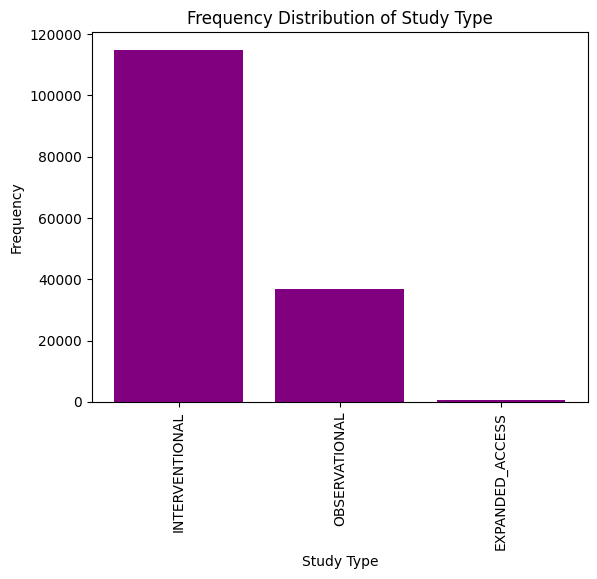

In [41]:
# lets plot for study type
study_type_counts = df['study_type'].value_counts()
plot_frequency_distribution(study_type_counts.index, study_type_counts.values, 'Study Type')

> Interventional study types formed a bigger part of the clinical trials.

Intervention refers to the medicinal product (e.g drug, device, vaccine, placebo etc) given to the patients in a study. Let’s see the top five interventions given in these studies

<Axes: title={'center': 'Top 5 Drugs tested'}>

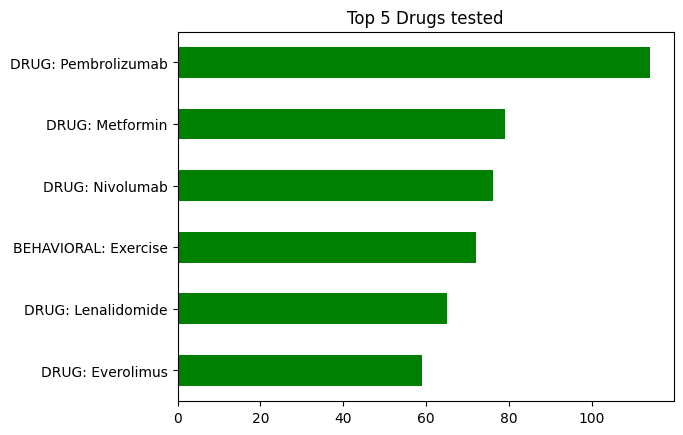

In [42]:
# lets see the top 5 drugs that were tested via the interventional study type
interventions = df[df['study_type']=='INTERVENTIONAL']
interventions['interventions'].value_counts().head(6).sort_values().plot(kind='barh', color='g', title='Top 5 Drugs tested')

> These are the top 5 drugs which were tested during the clinical trials.

Numerical

Lets see how large Interventional Trials are:


In [43]:
# lets select the target column in our df
df['enrollment'] = df['enrollment'].astype(int)

# Let's remove the trials with recruitment status withdrawn and terminated
enrollment = df.loc[
    (df['study_status'] != 'Withdrawn') & (df['study_status'] != 'Terminated')]

bins = [-1, 20, 40, 60, 100, 200, 400, 600, 1000]
group_names = ['< 20', '21-40', '41-60', '61-100', '101-200', '201-400', '401-600', '>600']
categories = pd.cut(enrollment['enrollment'], bins, labels=group_names)

# Let's add categories as a column in the DataFrame
enrollment['Category'] = categories

# Let's view value counts
enrollment_counts = enrollment['Category'].value_counts().sort_index(ascending=True)

# Now, let's create a DataFrame with two columns
table_df = pd.DataFrame({
    'Group Names': enrollment_counts.index,
    'Enrollment': enrollment_counts.values
})

print(table_df)


  Group Names  Enrollment
0        < 20       30352
1       21-40       23730
2       41-60       18102
3      61-100       19750
4     101-200       21237
5     201-400       14993
6     401-600        7124
7        >600        5825


> The majority of trials fall into the "< 20" and "21-40" enrollment categories, indicating that a significant portion of the trials have relatively small participant numbers.

> Trials with enrollments greater than 400 participants ("401-600" and ">600") are less common, which suggests that trials involving extremely large participant groups are relatively less prevalent.

### B) Bivariate Analysis

Categorical - Categorical

In [44]:
# Gender - Age
# lets make subplots to see the gender distributions among different ages in the clinical trials
i = 0
fig = make_subplots(rows=3, cols=2, subplot_titles=list(pd.DataFrame(df.groupby(['age'])['sex'].value_counts()).unstack().index))

for row in range(1, 4):
    for col in range(1, 3):
        dt = pd.DataFrame(df.groupby(['age'])['sex'].value_counts()).unstack().iloc[i]
        fig.add_trace(go.Bar(x=dt.sex.index, y=dt.sex.values), row=row, col=col)
        i += 1

# Set x and y labels
# Assuming you have a loop iterating over rows and columns
for row in range(1, 4):
    for col in range(1, 3):
        fig.update_xaxes(title_text="Sex", row=row, col=col)
        fig.update_yaxes(title_text="Count", row=row, col=col)


# Show the figure
fig.show()


> Most studies took data from all genders

> In (Adult) and (Child,Adult) Category there is significant number of Female patients considered for the studies

Text(0.5, 1.0, 'What Conditions are we trying to treat')

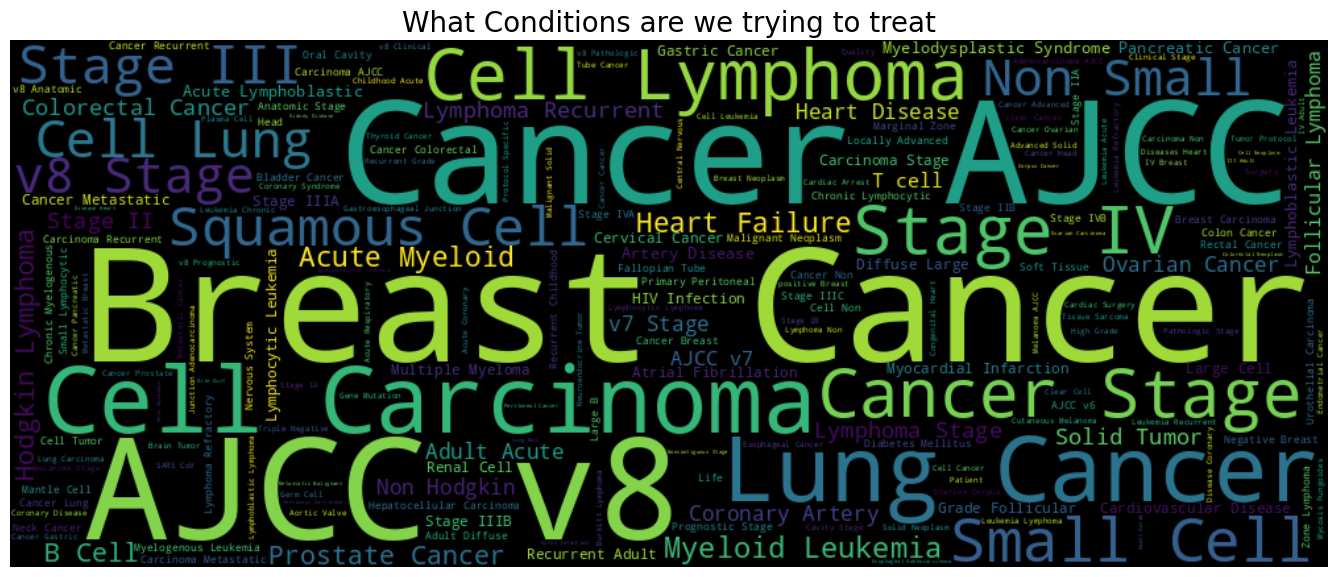

In [45]:
# lets create a word cloud to see which conditions are being focused on in the clinical trials

conditions=list(df['conditions'].dropna().unique())

# plotting the word cloud
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(width=1000,height=400).generate(" ".join(conditions))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('What Conditions are we trying to treat',fontsize=20)

Observations:

> The keywords are : Breast Cancer, Cancer, AJCC, cell, Carcinoma indicating major research being done to find a cure for these diseases

> Less Common conditions are Acute Myeloid, Large Cell Heart disease and Lymphoma.

In [46]:
df.columns

Index(['nct_number', 'study_title', 'study_url', 'study_status',
       'brief_summary', 'study_results', 'conditions', 'interventions',
       'primary_outcome_measures', 'secondary_outcome_measures', 'sponsor',
       'sex', 'age', 'phases', 'enrollment', 'funder_type', 'study_type',
       'study_design', 'other_ids', 'start_date', 'primary_completion_date',
       'completion_date', 'first_posted', 'last_update_posted', 'locations'],
      dtype='object')

Lets see the locations where the studies are taking place

In [47]:
# lets define the function to extract location
def splitLoc(loc):
    return loc.split(',')[-1].strip()

# lets apply the function to create the 'Loc' column
df['Loc'] = df['locations'].apply(lambda x: splitLoc(str(x)))

# now we count occurrences of each location
locations_counts = df['Loc'].value_counts()

# lets create a choropleth map with improved color contrast
fig = go.Figure([go.Choropleth(
    locations=locations_counts.index,
    z=locations_counts.values.astype(float),
    locationmode='country names',
    colorscale='YlOrRd',  # Change color scale to increase contrast
    autocolorscale=False,
    marker_line_color='white',
    text=locations_counts.index,
    showscale=True,
)])

fig.update_layout(title='Study Locations Globally')
fig.show()


> To view the interactive map, open the notebook on colab.

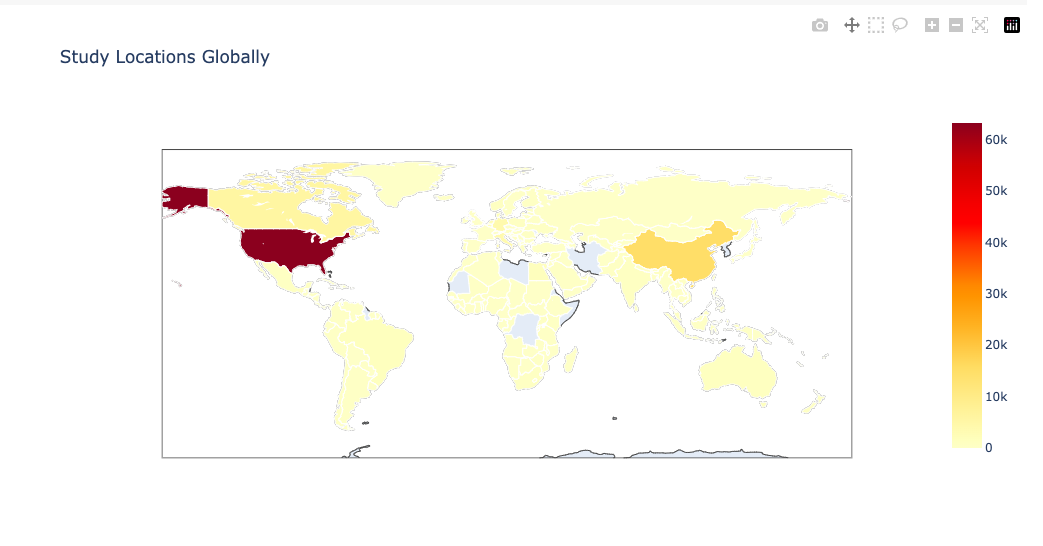

Observations:

> Most Studies take place in USA.

> Next highest count is in China.

Lets see the distribution of Completed and Terminated Clinical trials against Gender and Age

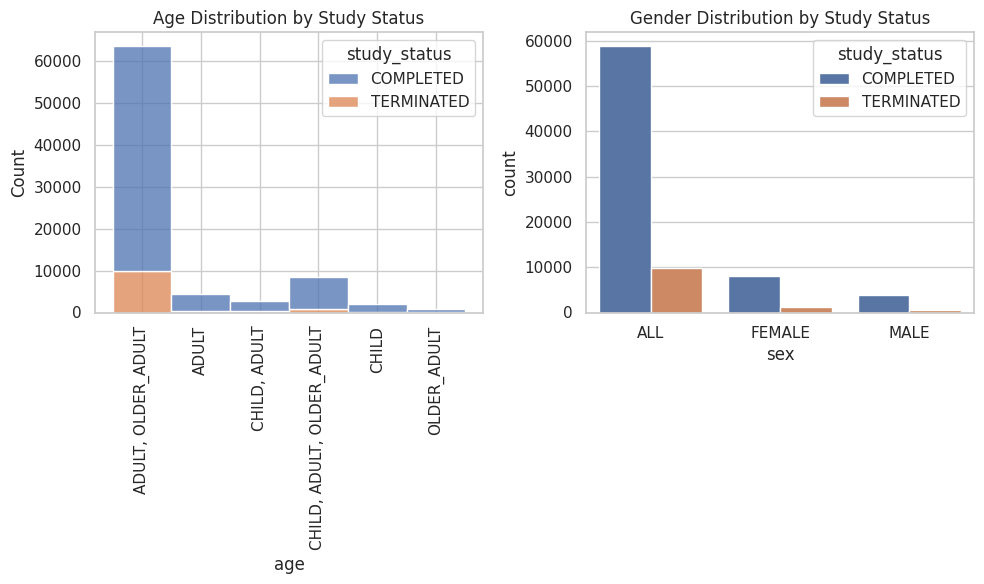

In [64]:
# lets filter completed and terminated trials
completed_terminated_trials = df[df['study_status'].isin(['COMPLETED', 'TERMINATED'])]

# lets set the style of the plots
sns.set(style="whitegrid")

# lets create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Plot age distribution by study status
sns.histplot(data=completed_terminated_trials, x="age", hue="study_status", multiple="stack", ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Plot gender distribution by study status
sns.countplot(data=completed_terminated_trials, x="sex", hue="study_status", ax=axes[1])
axes[1].tick_params(axis='x', rotation=0)

# Setting titles for subplots
axes[0].set_title('Age Distribution by Study Status')
axes[1].set_title('Gender Distribution by Study Status')
plt.tight_layout()
plt.show()

> For both Age and Gender, very few studies were terminated, most studies got to the completion stage.

Lets see the locations where most of the studies were terminated.

In [76]:
# lets filter completed and terminated trials
completed_terminated_trials = df[df['study_status'].isin(['COMPLETED', 'TERMINATED'])]

# we now count the number of studies in each location
study_counts = completed_terminated_trials['Loc'].value_counts().reset_index()
study_counts.columns = ['Location', 'Study Count']

# creating a Choropleth map with customized colors
fig = px.choropleth(study_counts,
                    locations='Location',
                    locationmode='country names',
                    color='Study Count',
                    hover_name='Location',
                    color_continuous_scale=['red', 'blue'],  # Red for terminated, blue for completed
                    title='Distribution of Completed and Terminated Studies by Location')

fig.update_geos(projection_type="natural earth")

# Customize legend
fig.update_layout(coloraxis_colorbar=dict(title='Study Count', tickvals=[0, study_counts['Study Count'].max()],
                                         ticktext=['Terminated', 'Completed'],
                                         tickmode='array', title_font_size=12))
fig.for_each_trace(lambda t: t.update(name='Completed' if t.name == 'COMPLETED' else t.name))

fig.show()

> For an interactive map, open the notebook on colab

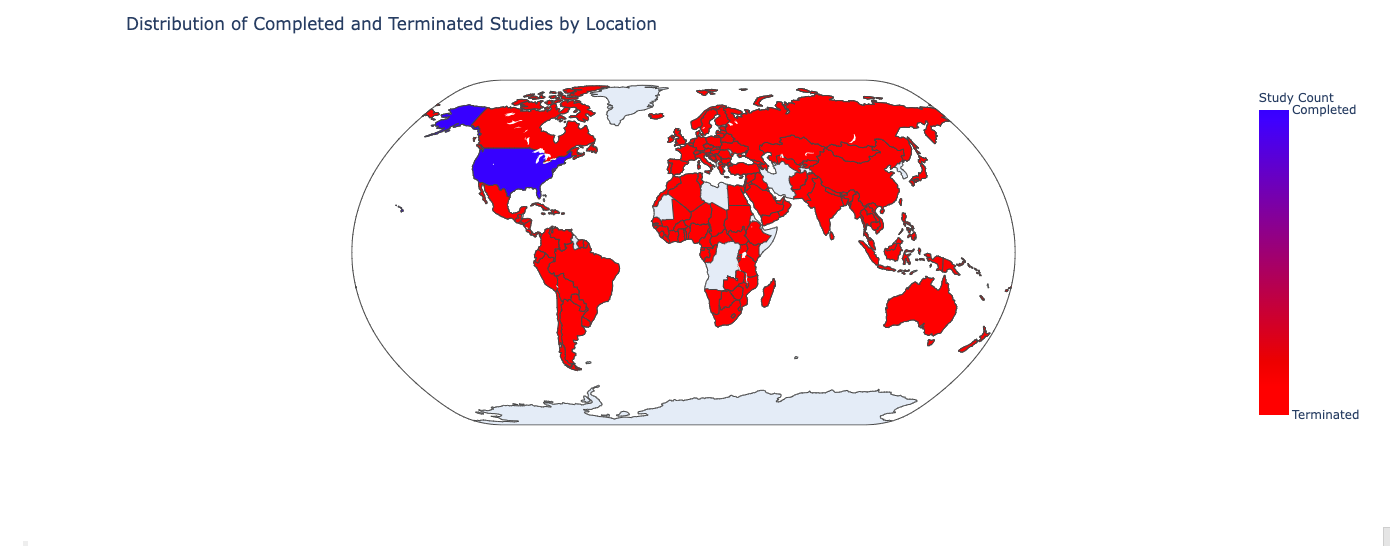

> The United States of America had the highest number of of completed studies as compared to anywhere else.

Lets see the **Diseases** involved in Clinical Trials that were Conducted in Kenya

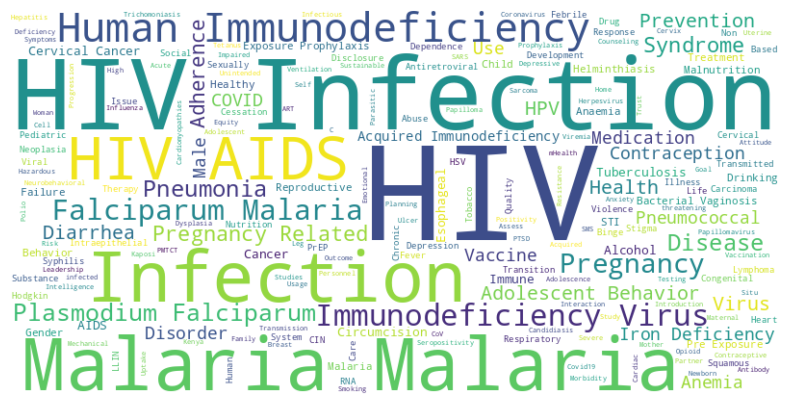

In [79]:
# lets filter trials for Kenya
kenya_trials = df[df['Loc'] == 'Kenya']

# now we concatenate all diseases into a single string
all_diseases = ' '.join(kenya_trials['conditions'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_diseases)

# lets display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


> The main focus in Kenya was HIV AIDS, Malaria and Pneumonia.

Lets see the top 5 sponsors for the clinical trials done in kenya.

In [80]:
# lets filter trials for Kenya
kenya_trials = df[df['Loc'] == 'Kenya']

# Get the top 5 sponsors
top_sponsors = kenya_trials['sponsor'].value_counts().nlargest(5)

print(top_sponsors)


University of Washington                      59
University of California, San Francisco       16
Duke University                               13
University of Oxford                          12
Centers for Disease Control and Prevention    11
Name: sponsor, dtype: int64


In [ ]:
# lets calculate the correlation between completion dates and study outcomes
completion_vs_outcome_corr = df['completion_date'].dt.year.corr(df['study_status'].astype('category').cat.codes)

# lets calculate the correlation between completion dates and study phases
completion_vs_phases_corr = df['completion_date'].dt.year.corr(df['phases'].astype('category').cat.codes)

# lets print the correlations
print(f"Correlation between completion dates and study outcomes: {completion_vs_outcome_corr}")
print(f"Correlation between completion dates and study phases: {completion_vs_phases_corr}")

Correlation between completion dates and study outcomes: 0.11142399086136807
Correlation between completion dates and study phases: -0.05947021892860517


The positive correlation is fairly weak. It indicates a slight tendency that as completion dates draws nearer, the study outcomes tend to be more positive. However, the correlation is not strong enough to make a definitive statement about causality or a strong relationship.

The negative correlation is even weaker. It suggests a slight tendency that as completion dates draw nearer, the study phases may tend to be earlier. Again, this correlation is not strong, and it's important to remember that correlation does not imply causation.

# 6. Modelling

Feature Extraction for Text Data

Train-Test Split and Model Training

Evaluate the Model